<a href="https://colab.research.google.com/github/ItsMeAbby/DL-Workshop-1/blob/master/classify_on_your_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ItsMeAbby/DL-Workshop-1.git

fatal: destination path 'DL-Workshop-1' already exists and is not an empty directory.


In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

Mounted at /content/gdrive


In [10]:
from fastai.vision.all import *
path = '/content/DL-Workshop-1/Rock'

def is_rock(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_rock, item_tfms=Resize(316))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.345313,0.514163,0.245614,00:11


epoch,train_loss,valid_loss,error_rate,time
0,0.700290,0.441751,0.228070,00:14
1,0.558958,0.294040,0.105263,00:13
2,0.437322,0.313614,0.140351,00:14
3,0.363375,0.313932,0.140351,00:13


In [7]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

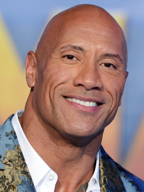

In [11]:
img = PILImage.create(uploader.data[0])
img.to_thumb(192)

In [13]:
is_rock,_,probs = learn.predict(img)
print(f"Is this a rock?: {is_rock}.")
print(f"Probability it's a rock: {probs[1].item():.6f}")

Is this a rock?: False.
Probability it's a rock: 0.056606
